## Instructions {-}

1. You may talk to a friend, discuss the questions and potential directions for solving them. However, you need to write your own solutions and code separately, and not as a group activity. 

2. Do not write your name on the assignment.

3. Write your code in the *Code* cells and your answer in the *Markdown* cells of the Jupyter notebook. Ensure that the solution is written neatly enough to understand and grade.

4. Use [Quarto](https://quarto.org/docs/output-formats/html-basics.html) to print the *.ipynb* file as HTML. You will need to open the command prompt, navigate to the directory containing the file, and use the command: `quarto render filename.ipynb --to html`. Submit the HTML file.

5. The assignment is worth 100 points, and is due on **Tuesday, 21st February 2023 at 11:59 pm**. 

6. **Five points are properly formatting the assignment**. The breakdown is as follows:
- Must be an HTML file rendered using Quarto (1 pt). *If you have a Quarto issue, you must mention the issue & quote the error you get when rendering using Quarto in the comments section of Canvas, and submit the ipynb file.* 
- No name can be written on the assignment, nor can there be any indicator of the student’s identity—e.g. printouts of the working directory should not be included in the final submission  (1 pt)
- There aren’t excessively long outputs of extraneous information (e.g. no printouts of entire data frames without good reason, there aren’t long printouts of which iteration a loop is on, there aren’t long sections of commented-out code, etc.) (1 pt)
- Final answers of each question are written in Markdown cells (1 pt).
- There is no piece of unnecessary / redundant code, and no unnecessary / redundant text (1 pt)

## Data description {-}
The data is related with direct marketing campaigns of a Portuguese banking institution. The marketing campaigns were based on phone calls, where bank clients were called to subscribe for a term deposit. 

There is one train data - *train.csv*, which you will use to develop a model. There are two test datasets - *test1.csv* and *test2.csv*, which you will use to test your model. Each dataset has the following attributes about the clients called in the marketing campaign:

1. `age`: Age of the client

2. `education`: Education level of the client 

3. `day`: Day of the month the call is made

4. `month`: Month of the call 

5. `y`: did the client subscribe to a term deposit? 

6. `duration`: Call duration, in seconds. This attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the `duration` is not known before a call is performed. Also, after the end of the call `y` is obviously known. Thus, this input should only be included for inference purposes and should be discarded if the intention is to have a realistic predictive model.

(Raw data source: [Source](https://archive.ics.uci.edu/ml/datasets/bank+marketing). Do not use the raw data source for this assingment. It is just for reference.)

## Instructions / suggestions for answering questions{-} 

(1) **Instruction:** Use *train.csv* for all questions, unless otherwise stated.

(2) **Suggestion 1:** You may use the functions in the class notes for printing the confusion matrix and the overall classification accuracy based on test / train data. 

(3) **Suggestion 2:**: If you make variable transformations, you will need to do it for all the three datasets. Your code will be a bit concise if you make a function containing all the transformations, and then call it for the training and the two test datasets. You can put this function in the beginning of the code and keep adding transformations to it as you proceed with the assignment. You may need transformations in questions (1) and (13).

## D.1 Probability of response vs call duration
Read the datasets. Make an appropriate visualization to visualize how the proportion of clients subscribing to a term deposit change with increasing call duration.

*(4 points)*

**Hints**: 

1.  Bin `duration` to create `duration_binned`. Group the data to find the fraction of clients responding positively to the marketing campaign for each bin in `duration_binned`. Make a lineplot of percentage of clients subscribing to a term deposit vs `duration_binned`, where the bins in `duration_binned` are arranged in increasing order of duration. 

2. You may choose an appropriate number of bins & type of binning that helps you visualize well. 

3. You may also think of other ways of visualization. You don't need to stick with this one.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm

In [2]:
train= pd.read_csv('train.csv')
test1= pd.read_csv('test1.csv')
test2= pd.read_csv('test2.csv')

In [3]:
binned_duration = pd.qcut(train['duration'], 11, retbins = True)
train['duration_binned'] = binned_duration[0]

In [4]:
train.y = train.y.apply(lambda x: 0 if x == "no" else 1)
test1.y = test1.y.apply(lambda x: 0 if x == "no" else 1)
test2.y = test2.y.apply(lambda x: 0 if x == "no" else 1)

In [5]:
subscription_data = train.groupby('duration_binned')['y'].agg([('percent_subscribed','mean'),('nobs','count')]).reset_index(drop=False)
subscription_data

,duration_binned,percent_subscribed,nobs
0,"(-0.001, 55.0]",0.001866,3216
1,"(55.0, 84.0]",0.010880,3217
2,"(84.0, 110.0]",0.028369,3243
3,"(110.0, 135.0]",0.035889,3065
4,"(135.0, 164.0]",0.064134,3212
5,"(164.0, 198.0]",0.075412,3156
6,"(198.0, 241.0]",0.105643,3190
7,"(241.0, 299.0]",0.129577,3195
8,"(299.0, 390.0]",0.147832,3159
9,"(390.0, 572.0]",0.220505,3170


Text(0.5, 0, 'duration_bin')

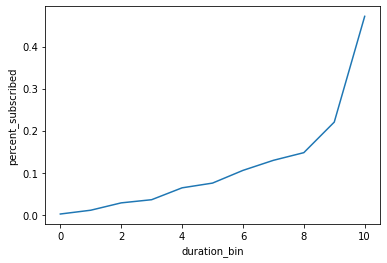

In [6]:
sns.lineplot(x = subscription_data.index, y = subscription_data['percent_subscribed'])
plt.xlabel('duration_bin')

## D.2 Predictor `duration`
Based on the plot in D.1, comment whether `duration` seems to be a useful variable to predict if the client will subsribe to a term deposit.

*(1 point)*

Based on the plot duration seems like a useful variable. There is an incease in the percentage of subcribers with and increase in duration 

## D.3 Model based on `duration`
Develop a logisitic regression model to predict if the client subscribed to a term deposit based on call `duration`. Use the model to make a lineplot showing the probability of the client subscribing to a term deposit based on call `duration`.

*(3 points)*

Optimization terminated successfully.
         Current function value: 0.305028
         Iterations 7


<AxesSubplot:xlabel='duration', ylabel='y'>

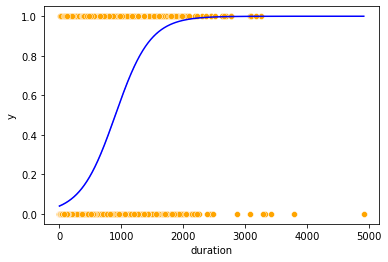

In [7]:
sns.scatterplot(x = 'duration', y = 'y', data = train, color = 'orange') 
logit_model = sm.logit(formula = 'y~duration', data = train).fit() 
sns.lineplot(x = 'duration', y= logit_model.predict(train), data = train, color = 'blue') 

In [8]:
print(logit_model.summary())

                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34998
Method:                           MLE   Df Model:                            1
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                  0.1560
Time:                        22:04:30   Log-Likelihood:                -10676.
converged:                       True   LL-Null:                       -12650.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.1841      0.030   -107.465      0.000      -3.242      -3.126
duration       0.0035   6.24e-05     56.446      0.000       0.003       0.004


## Note {-}: 
Answer questions D.4 to D.11 based on the regression model developed in D.3.

## D.4 Model significance
Is the regression model in statistically significant? Justify your answer.

*(1 point for code, 1 point for answer)*

Yes since LLR p-value is 0. 

## D.5 Subscription probability in 5 minutes
What is the probability that the client subscribes to a term deposit with a 5-minute marketing call? Note that the call `duration` in data is given in *seconds*.

*(2 points)*

In [9]:
druation = pd.DataFrame([300], columns=['duration'])
logit_model.predict(druation)

0    0.106491
dtype: float64

Probability is 10.6%

## D.6 Call duration for subscription
What is the minimum call duration (in minutes) for which a client has a 95% or higher chance of subscribing to a term deposit?

*(4 points)*

0.95=1/1+e^-(-3.1841+0.0035X1)

29 minutes

## D.7 Maximum call duration
What is the maximum call duration (in minutes) in which a client refused to subscribe to a term deposit? What was the probability of the client subscribing to the term deposit in that call?

*(4 points)*

In [10]:
train[train.y == 0].sort_values(by = 'duration', ascending = False).iloc[0]

age                             59
education                 tertiary
day                             10
month                          nov
y                                0
duration                      4918
duration_binned    (572.0, 4918.0]
Name: 34120, dtype: object

In [11]:
df = pd.DataFrame([4918], columns=['duration'])
logit_model.predict(df)

0    0.999999
dtype: float64

Maximum duration is 82 minutes and the probability of subscription is 99%.  

## D.8 Percent increase in odds
What is the percentage increase in the odds of a client suscribing to a term deposit when the call `duration` increases by a minute?

*(4 points)*

In [12]:
(np.exp(0.0035*60)-1)*100

23.367805995674317

23.3%

## D.9 Doubling the subscription odds
How much must the call `duration` increase (in minutes) so that it doubles the odds of the client subscribing to a term deposit.

*(3 points)*

In [13]:
0.0035*60

0.21

e^0.21x=2 

This equals = 3.3

Call buration must increase by 3.3 mintues to double the odds of a client subscription. 

## D.10 Classification accuracy
What is minimum overall classification accuracy of the model among the classification accuracies on *train.csv*, *test1.csv* and *test2.csv*? Consider a threshold of 30% when classifying observations.

*(2 + 1 + 1 points)*

In [14]:
# Helper functions

# for training data only
def confusion_matrix_train(model, cutoff = 0.5):
    
    cm_df = pd.DataFrame(model.pred_table(threshold = cutoff))
    
    #Formatting the confusion matrix
    cm_df.columns = ['Predicted 0', 'Predicted 1'] 
    cm_df = cm_df.rename(index={0: 'Actual 0',1: 'Actual 1'})
    cm = np.array(cm_df)
    
    # calculate the accuracy
    accuracy = (cm[0,0] + cm[1,1])/cm.sum()
    
    # formatting stuffs
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
    return cm_df, accuracy

# For test data only, data and true test responses given as separate inputs
def confusion_matrix_test(model, data, actual_values, cutoff = 0.5):
    
    # predict the values
    pred_values = model.predict(data) # these will be probabilities
    
    # Specify bins to do the cutoff thing
    bins = np.array([0, cutoff, 1])
    
    # Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
    
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    
    return cm_df, accuracy
    
def confusion_matrix_data(data, actual_values, model, cutoff = 0.5):
     
    # predict the values
    pred_values = model.predict(data) # these will be probabilities
    
    # Specify bins to do the cutoff thing
    bins = np.array([0, cutoff, 1])
    
    # Confusion matrix
    cm = np.histogram2d(actual_values, pred_values, bins = bins)[0]
    
    cm_df = pd.DataFrame(cm)
    cm_df.columns = ['Predicted 0','Predicted 1']
    cm_df = cm_df.rename(index={0: 'Actual 0',1:'Actual 1'})
    
    accuracy = (cm[0,0]+cm[1,1])/cm.sum()
    
    fnr = (cm[1,0])/(cm[1,0]+cm[1,1])
    fpr = (cm[0,1])/(cm[0,0]+cm[0,1])
    
    precision = (cm[1,1])/(cm[1,1]+cm[0,1])
    tpr = (cm[1,1])/(cm[1,0]+cm[1,1]) # Recall
    
    # fpr_roc, tpr_roc, auc_thresholds = roc_curve(actual_values, pred_values)
    # auc_value = (auc(fpr_roc, tpr_roc))# AUC of ROC
    sns.heatmap(cm_df, annot=True, cmap='Blues', fmt='g')
    plt.ylabel("Actual Values")
    plt.xlabel("Predicted Values")
    print("Classification accuracy = {:.1%}".format(accuracy))
    print("Precision = {:.1%}".format(precision))
    print("TPR or Recall = {:.1%}".format(tpr))
    print("FNR = {:.1%}".format(fnr))
    print("FPR = {:.1%}".format(fpr))
    # print("ROC-AUC = {:.1%}".format(auc_value))

Classification accuracy = 88.5%


(          Predicted 0  Predicted 1
 Actual 0      29778.0       1118.0
 Actual 1       2896.0       1208.0,
 0.8853142857142857)

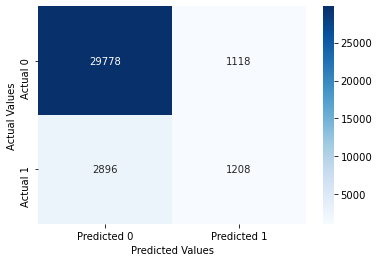

In [15]:
confusion_matrix_train(logit_model, 0.3)

Classification accuracy = 88.4%


(          Predicted 0  Predicted 1
 Actual 0       4331.0        177.0
 Actual 1        414.0        178.0,
 0.8841176470588236)

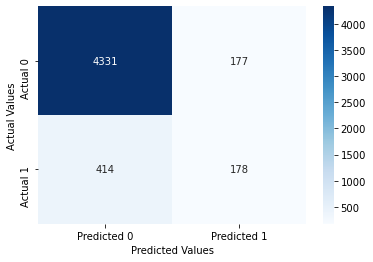

In [16]:
confusion_matrix_test(logit_model, test1, test1.y, 0.3)

Classification accuracy = 88.6%


(          Predicted 0  Predicted 1
 Actual 0       4355.0        163.0
 Actual 1        418.0        175.0,
 0.8863236157307768)

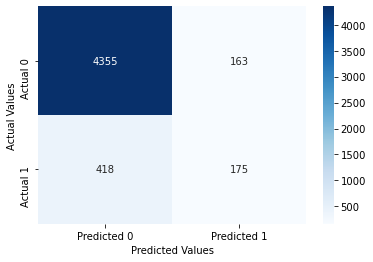

In [17]:
confusion_matrix_test(logit_model, test2, test2.y, 0.3)

88.4%

## D.11 Recall
What is the minimum *Recall* of the model among the *Recall* performance on *train.csv*, *test1.csv* and *test2.csv*? Consider a decision threshold probability of 30% when classifying observations. 

Here, *Recall* is the proportion of clients predicted to subscribe to a term deposit among those who actually subscribed.

*(3 points for code)*

Classification accuracy = 88.5%
Precision = 51.9%
TPR or Recall = 29.4%
FNR = 70.6%
FPR = 3.6%


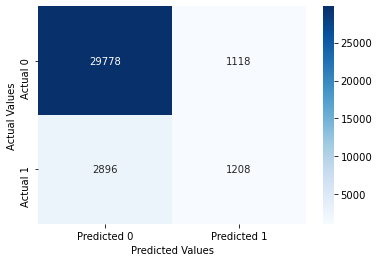

In [18]:
confusion_matrix_data(train, train.y, logit_model, 0.3)

Classification accuracy = 88.4%
Precision = 50.1%
TPR or Recall = 30.1%
FNR = 69.9%
FPR = 3.9%


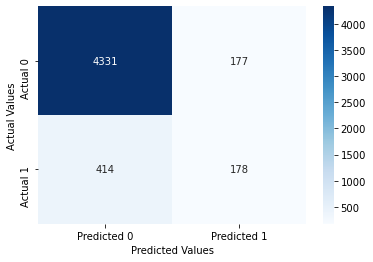

In [19]:
confusion_matrix_data(test1, test1.y, logit_model, 0.3)

Classification accuracy = 88.6%
Precision = 51.8%
TPR or Recall = 29.5%
FNR = 70.5%
FPR = 3.6%


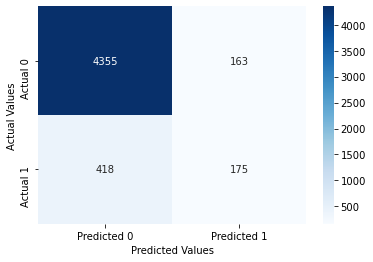

In [20]:
confusion_matrix_data(test2, test2.y, logit_model, 0.3)

29.4%

## D.12 Subscription probability based on `age` and `education`
Develop a logistic regression model to predict the probability of a client subscribing to a term deposit based on `age`, `education` and the two-factor interaction between `age` and `education`. Based on the model, answer:

a. People with which type of `education` *(primary / secondary / tertiary / unknown)* have the highest percentage increase in odds of subscribing to a term deposit with a unit increase in `age`? Justify your answer. 

b. What is the percentage increase in odds of a person subscribing to a term deposit for a unit increase in `age`, if the person has *tertiary* `education`. 

c. What is the percentage increase in odds of a person subscribing to a term deposit for a unit increase in `age`, if the person has *primary* `education`.

*(1 point for developing the model, 3 points for (a), 3 points for (b), 3 points for (c))*

In [21]:
logit_model = sm.logit(formula = 'y~age*education', data = train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.356771
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34992
Method:                           MLE   Df Model:                            7
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                 0.01288
Time:                        22:04:32   Log-Likelihood:                -12487.
converged:                       True   LL-Null:                       -12650.
Covariance Type:            nonrobust   LLR p-value:                 1.897e-66
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -4.6063      0.209    -22.083      0.000      

In [22]:
#Primary education
print((np.exp(0.0462)-1)*100)

#Secondary education
print((np.exp(0.0462-0.0371)-1)*100)

#Tertiary education
print((np.exp(0.0462-0.0447)-1)*100)

#Unknown education
print((np.exp(0.0462-0.0443)-1)*100)

4.728384678201292
0.9141530881416449
0.1501125562711092
0.19018061437099387


Primary eduction have the highest percentage increase in odds of subscribing to a term deposit with a unit increase in `age`

Tertiary education has a 0.15% increase in odds of subscribing to a term deposit with a unit increase in age

Primary education has a 4.73% increase in odds of subscribing to a term deposit with a unit increase in age

## D.13 Model development
Develop a logistic regression model *(using train.csv)* to predict the probability of a client subscribing to a term deposit based on `age`, `education`, `day` and `month`. The model must have: 

a.  Minimum overall classification accuracy of 75% among the classifcation accuracies on *train.csv*, *test1.csv* and *test2.csv*. 

b. Minimum recall of 50% among the recall performance on *train.csv*, *test1.csv* and *test2.csv*. 

For all the three datasets - *train.csv*, *test1.csv* and *test2.csv*, print the: 

1. Model summary (only for *train.csv*), 

2. Confusion matrices,

3. Overall classification accuracies, and

4. Recall



Note that: 

1. You cannot use `duration` as a predictor because its value is determined after the marketing call ends. However, after the call ends, we already know whether the client responded positively or negatively. That is why we have used `duration` only for inference in the previous questions. It helped us understand the effect of the length of the call on marketing success. 

2. It is possible to develop the model satisfying constrains (a) and (b) with just appropriate transformation(s) of the predictor(s). However, you may consider interactions if you wish. Justify the transformations, if any, with visualizations.

3. You are free to choose any value of the decision thershold probability for classifying observations. However, you must use the same threshold on all the three datasets.

*(15 points)*

In [23]:
logit_model = sm.logit(formula = 'y~age*education+day*month', data = train).fit()
print(logit_model.summary())

Optimization terminated successfully.
         Current function value: 0.325788
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                35000
Model:                          Logit   Df Residuals:                    34969
Method:                           MLE   Df Model:                           30
Date:                Sun, 26 Feb 2023   Pseudo R-squ.:                 0.09860
Time:                        22:04:33   Log-Likelihood:                -11403.
converged:                       True   LL-Null:                       -12650.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                 coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------
Intercept                     -3.6970      0.253    -14.606      0.000      

Classification accuracy = 75.1%
Precision = 24.1%
TPR or Recall = 52.4%
FNR = 47.6%
FPR = 21.9%


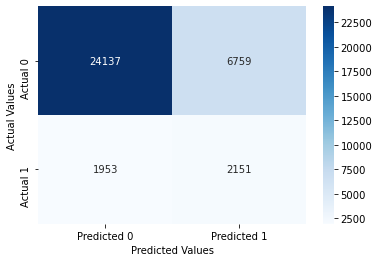

In [24]:
confusion_matrix_data(train, train.y, logit_model, 0.115)

Classification accuracy = 75.9%
Precision = 24.4%
TPR or Recall = 51.5%
FNR = 48.5%
FPR = 20.9%


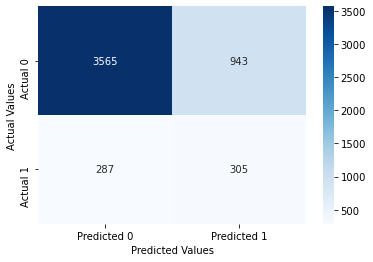

In [25]:
confusion_matrix_data(test1, test1.y, logit_model, 0.115)

Classification accuracy = 75.5%
Precision = 25.2%
TPR or Recall = 56.3%
FNR = 43.7%
FPR = 22.0%


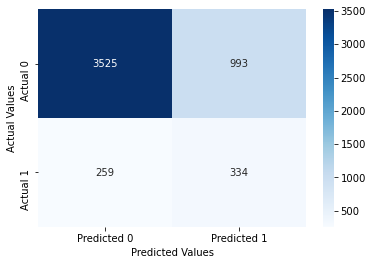

In [26]:
confusion_matrix_data(test2, test2.y, logit_model, 0.115)

## D.14 ROC-AUC
Report the probability that the model will predict a higher probability of response for a customer who signs up for the
term deposit as compared to the customer who does not sign up, i.e., the ROC-AUC of the developed model in D.13.

*Hint:* Use the functions `roc_curve`, and `auc` from the `sklearn.metrics` module

*(3 points)*

In [27]:
from sklearn.metrics import roc_curve, auc

y = train.y
ypred = logit_model.predict(train)

fpr, tpr, auc_thresholds = roc_curve(y,ypred)

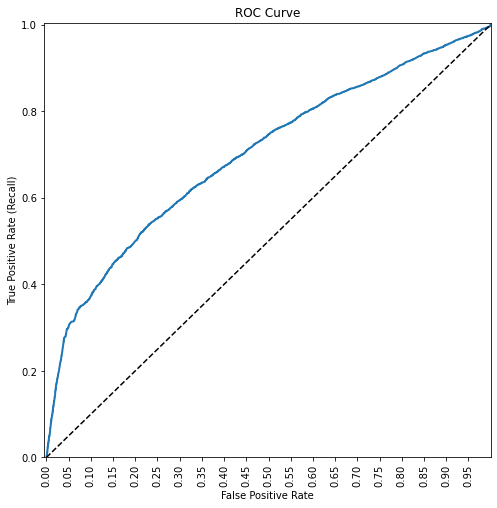

In [28]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(8,8))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")

plot_roc_curve(fpr, tpr)

In [29]:
auc(fpr,tpr)

0.699087138244332

ROC-AUC = 70%

## D.15 Net-profit
Suppose that the model developed in D.13 is used to predict the clients in *test1.csv* and *test2.csv* who will respond positively to the campaign. Only those clients who are predicted to respond positively are called during the marketing campaign. Assume that:

1. A profit of \\$100 is associated with a client who responds positively to the campaign,

2. A loss of \\$10 is associated with a client who responds negatively to the campaign

What is the net profit from the campaign? Use the confusion matrices printed in D.13.

*(4 points)*

test1= 305(100)-943(10) = 21,070
test2= 334(100)-993(10) = 23,470

## D.16 Decision threshold probability
Based on the profit and loss associated with client responses specified in D.15, and the model developed in D.13, find the decision threshold probability of classification, such that the net profit is maximized. Use *train.csv*

Proceed as follows:

1. You would have obtained FPR and TPR for all potential decision threshold probabilities in D.14. 

2. Formulate an expression quantifying the net profit per client *(among all the clients called in the marketing campaign)*, in terms of FPR, TPR, and the overall response rate, i.e., proportion of people actually subscribing to the term deposit.

3. Find the decision threshold probability that maximizes the expression in (2).

*(5 points)*

Net profit per client = (n x TPR x ORR x 100) - (n x FPR x (1 - ORR) x 10)


In [30]:
orr_train = train[train.y == 1].shape[0]/train.shape[0]

n = train.shape[0]

df = pd.DataFrame(np.concatenate((fpr.reshape((9989,1)), tpr.reshape((9989,1)), auc_thresholds.reshape((9989,1))), axis = 1), columns = ['FPR', 'TPR', 'Threshold'])

df['Profit'] = (n*df['TPR']*orr_train*100) - (n*df['FPR']*(1-orr_train)*10)

df.sort_values(by = 'Profit', ascending = False).iloc[0]

FPR               0.325155
TPR               0.618908
Threshold         0.101108
Profit       153540.000000
Name: 4434, dtype: float64

10.1% = maximize the profit

## D.17 Net profit based on new decision threshold probability
Using the new decision threshold probability obtained in D.16, answer D.15, i.e., what is the net-profit associated with the clients in *test1.csv* and *test2.csv* if a marketing campaign is performed. Again, only those clients who are predicted to respond positively, based on the new decision threshold probability, are called during the marketing campaign

Also, print the confusion matrices for predictions on *test1.csv* and *test2.csv* with the new threshold probability.

*(4 points)*

Classification accuracy = 66.6%
Precision = 19.6%
TPR or Recall = 60.6%
FNR = 39.4%
FPR = 32.7%


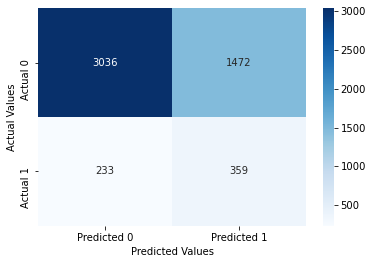

In [31]:
confusion_matrix_data(test1, test1.y, logit_model, 0.101108)

In [32]:
print(359*100-1472*10)

21180


Profit test1= 21180

Classification accuracy = 67.8%
Precision = 21.1%
TPR or Recall = 64.9%
FNR = 35.1%
FPR = 31.8%


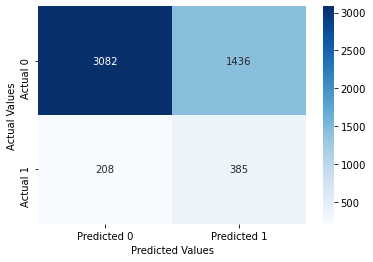

In [33]:
confusion_matrix_data(test2, test2.y, logit_model, 0.101108)

In [34]:
print(385*100-1436*10)

24140


Profit test2= 24140

## D.18 Model preference
Was the classification accuracy of the model in D.13 higher than that of the model in D.17? If yes, then should you prefer the model in D.13 for the marketing campaingn? Why or why not?

*Note: The model in D.17 is the same as in D.13, except with a different decision threshold probability*

*(3 points)*

No it was not higher. However for the purpose of a marketing campaign, D.17 would be recommended as it returns a slightly higher profit than the model in D.13 which is the best option for this problem according to our analysis.

## D.19 ROC curve
Plot the ROC curve for the model developed in D.13. Mark the point on the curve corresponding the decision threshold probability identified in D.16.

*Note that the ROC curve is independent of the decision threshold probability used by the model for prediction*

*(3 points)*

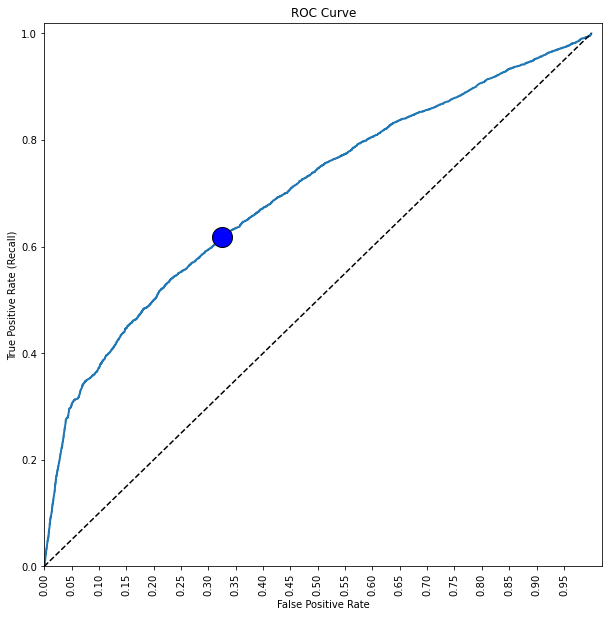

In [35]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.figure(figsize=(10,10))
    plt.title('ROC Curve')
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.axis([-0.005, 1, 0, 1.005])
    plt.xticks(np.arange(0,1, 0.05), rotation=90)
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate (Recall)")
    plt.plot(0.325155, 0.618908, marker="o", markersize=20, markeredgecolor="black", markerfacecolor="blue")
    plt.xlim(0, 1.02)
    plt.ylim(0, 1.02)

plot_roc_curve(fpr, tpr)

## D.20 Profit with TPR / FPR

Make a scatterplot of TPR vs FPR, and color the points based on net profit per client.

You can use the following code to make the plot if you have the relevant metrics in `tpr`, `fpr`, and `net_profit`

*(1 point)*

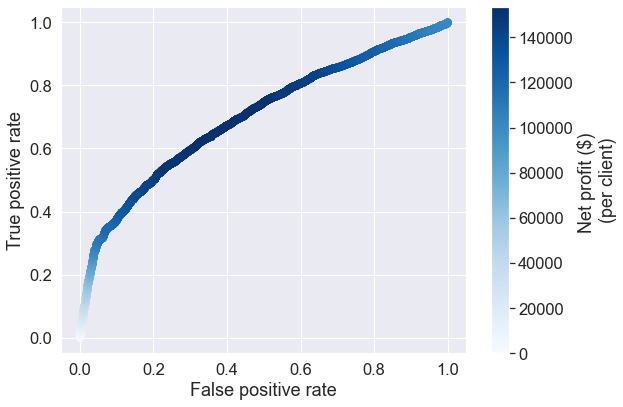

In [36]:
#| eval: false
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.5)
plt.rcParams["figure.figsize"] = (9,6)
plt.rcParams["figure.autolayout"] = True
f, ax = plt.subplots()
points = ax.scatter(fpr, tpr, c = df.Profit, s=50, cmap="Blues")
f.colorbar(points, label = "Net profit ($) \n(per client)")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

## D.21 Precision-recall
Compare the precision and recall of the models in D.13 and D.17 on *train.csv*.

*Note: The model in D.17 is the same as in D.13, except with a different decision threshold probability*

*(4 points)*

Classification accuracy = 75.1%
Precision = 24.1%
TPR or Recall = 52.4%
FNR = 47.6%
FPR = 21.9%


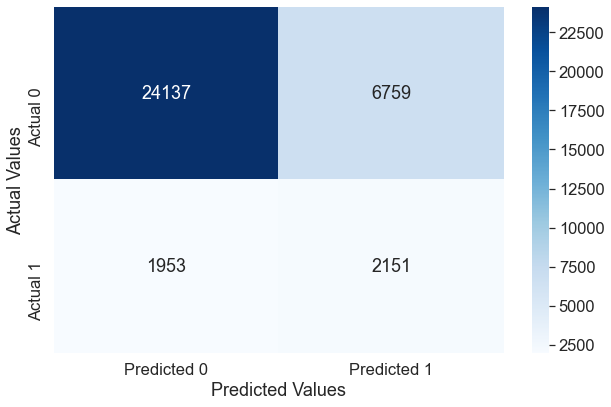

In [37]:
confusion_matrix_data(train, train.y, logit_model, 0.115)

Classification accuracy = 66.8%
Precision = 20.2%
TPR or Recall = 61.9%
FNR = 38.1%
FPR = 32.5%


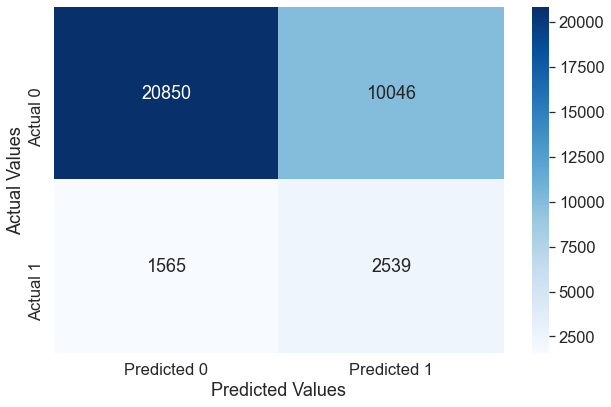

In [38]:
confusion_matrix_data(train, train.y, logit_model, 0.101108)

D.13 higher precision but a lower recall. D.17 higher recall but a lower precision

## D.22 Precision-recall: important metric
Based on the above comparison, which metric among precision and recall turns out to be more important for maximizing the net profit in the marketing campaign?

*(1 point)*

Recall is more important.

## D.23 Precision-recall curve
Plot the precision-recall curve vs decision threshold probability for the model developed in D.13. Mark the points on the curve corresponding to the decision threshold probability identified in D.16.

*(3 points)*

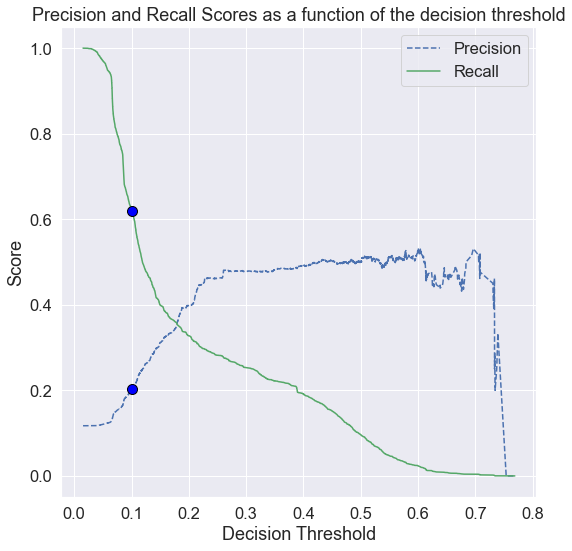

In [39]:
from sklearn.metrics import precision_recall_curve

y = train.y # true response
ypred = logit_model.predict(train)

p, r, thresholds = precision_recall_curve(y,ypred) 

def plot_precision_recall_vs_threshold(precisions, recalls, thresholds):
    plt.figure(figsize=(8, 8))
    plt.title("Precision and Recall Scores as a function of the decision threshold")
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot(0.101108, .202, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="blue")
    plt.plot(0.101108, .619, marker="o", markersize=10, markeredgecolor="black", markerfacecolor="blue")
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='best')
    plt.legend()
plot_precision_recall_vs_threshold(p, r, thresholds)

## D.24 Precision-recall vs FPR-TPR

Instead of using the FPR and TPR metrics to find the optimium decision threshold probability in D.16, used the precision-recall metrics to find the same.

*(5 points)*

In [40]:
thresholds = np.append(thresholds, 1)

In [43]:
df = pd.DataFrame(np.concatenate((p.reshape((12674,1)), r.reshape((12674,1)), thresholds.reshape((12674,1))), axis = 1), columns = ['Precision', 'Recall', 'Threshold'])

In [44]:
n = train.shape[0]

orr_train = train[train.y == 1].shape[0]/train.shape[0]

def profit(x):
    
    precision = x.Precision
    recall = x.Recall
    cutoff = x.Threshold
    
    cm = pd.DataFrame(logit_model.pred_table(threshold = cutoff))
    cm = np.array(cm)
    
    tp = cm[1,1]
    fp = cm[0,1]
    
    profit = n*orr_train*recall*100-n*((tp+fp)/n)*(1-precision)*10
    
    return profit

df['Profits'] = df.apply(profit, axis = 1)

In [45]:
df.sort_values(by = 'Profits', ascending = False).iloc[0]

Precision         0.201812
Recall            0.618908
Threshold         0.101108
Profits      153547.981885
Name: 6605, dtype: float64

Optimal threshold is 10.1%